# KNN  K Nearest Neighbors
- It's an adhoc algorithm which decides the prediction class on the basis of majority class near the test instance
- Odd numbers are preferred as the value of k - to avoid the possibility of tie
- Lazy learning algorithm - the learning of the algo will defer until the test instance arrives
- A small value of k will lead to low bias error but high variance error
- Larger value of k will provide a smoother and less variable fit (because the prediction is dependent on several points, so changing 1 observation has a small effect)
- Outliers need to be removed
- Noisy data is a problem, but when large value of k, the problem can be handled
- Feature selection is important here, since knn gives equal importance to all the features
- The nearest neighbors are found out using the euclidean distance. KNN preferably used for continuous variables. Though you can use it on factor variables also, once they are converted to numerical format (ordered factor variables have to go through label encoding and nominal factor variables have to go through one hot encoding or dummy variable creation)
- Scaling of data is important for calculation of euclidean distance (either standardscalar, min max scaler or robust scaler)



#### Applications of knn
- used in search applications where we are looking for items similar to search term
- recommender systems, where recommender recommends the movies / books similar to the one I purchased
- social media, which recommends videos similar to the ones I like to watch
- stock market - predicting the price based on the prices of similar companies

In [1]:
import pandas as pd
import numpy as np
gc = pd.read_csv(r"German_credit_classification.csv")

In [2]:
gc.head(2)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201


In [3]:
gc.liable.value_counts()

1    845
2    155
Name: liable, dtype: int64

In [4]:
#selected all continuous variables
gc1 = gc[["Default", "duration", "amount", "installment", "residence", "age", "cards" ]]
X = gc1.drop("Default", axis = 1)
y = gc1["Default"]

In [5]:
X.head(2)

,duration,amount,installment,residence,age,cards
0,6,1169,4,4,67,2
1,48,5951,2,2,22,1


In [6]:
y[:2]

0    0
1    1
Name: Default, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = .3, random_state = 2)

In [8]:
#implement standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = ss.fit_transform(X_train)
Xtest = ss.transform(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
X_train = pd.DataFrame(Xtrain, columns=X_train.columns)
X_test = pd.DataFrame(Xtest, columns=X_test.columns)

In [11]:
X_test.head(2)

,duration,amount,installment,residence,age,cards
0,-0.198555,-0.390968,0.919510,-0.797198,0.132831,-0.703434
1,-0.452492,-0.676856,-0.856095,-0.797198,1.004264,1.093660


In [12]:
y_train[:1], y_test[:1]

(90    0
 Name: Default, dtype: int64, 37    1
 Name: Default, dtype: int64)

#### knn - k nearest neighbours
- non-parametric algorithm unlike Li Re and lo re -i.e it makes no assumptions about the distribution of the x vars
- lazy learning algorithm unlike lo re which learning based on training data itself. knn is going defer the learning until the test instances arrive
- used only on numerical data
- continuous var - euclidean formula  ((x1-y1)**2 + (x2-y2)**2 + (x3 - y3)**2)**(1/2)
- categorical vars - manhattan formula  (|x1-y1|**1 + |x2-y2|**1 + |x3 - y3|**1)**(1)
- minkowski distance: (|x1-y1|**p + |x2-y2|**p + |x3 - y3|**p)**(1/p) - default value of p = 2 representing the euclidean distance, change it to 1 to get the manhattan distance. Try p = 1/2/3 for numeric data. 
- For mixed data use Gower Method (not in sklearn).
- Hamming distance also used for nominal categorical data.
- KNN can be used for regression problems also. There we use averaging of the y values of k nearest neighbors.
- Small value of K provides the most flexible fit, which will have low bias error but high variance error. Variance is because the prediction in a given region is entirely dependent on just one observation. A larger value of k provides smoother or less variable fit. The prediction in a region is an average of several points, and so changing one observation has a smaller effect. 
- For the same reason knn is also less sensitive to noise.

- Choice of algo: ball_tree, kd_tree, brute, auto. The best is brute, 2nd best kd_tree, 3rd best is ball_tree.
- Brute force algo - looks for the k nearest neighbours, and do the classification according to voting.
- Auto will look at the number of rows and decide which algo to use. Never choose auto. Make a decision yourself.
- We can speed up the knn by using kdtree. Kdtree will create the tree according to columns of highest variance. The tree will be created till the leaf-size is matched. The final voting will still be held in the end. 

- <10000 rows	<10 cols	Brute Force
- greater than 25000 rows	<15 to 20 cols	KD Tree
- greater than 25000 rows >20 cols 	Ball Tree

In [13]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)
score = accuracy_score(y_test, knn.predict(X_test))
score

0.6333333333333333

In [15]:
recall_score(y_test, knn.predict(X_test))

0.26262626262626265

In [16]:
knn.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [17]:
knn.predict_proba(X_test)[:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [18]:
acc_score = []
for k in range (3,70, 2):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    #for parallel processing to find the distance bw the test instance and training instances
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    #score = f1_score(y_test, knn.predict(X_test))
    acc_score.append(score)
    
print(acc_score)

[0.6333333333333333, 0.6233333333333333, 0.6533333333333333, 0.6566666666666666, 0.6666666666666666, 0.65, 0.6633333333333333, 0.6633333333333333, 0.67, 0.67, 0.6733333333333333, 0.67, 0.6533333333333333, 0.6633333333333333, 0.66, 0.6566666666666666, 0.6533333333333333, 0.6533333333333333, 0.6666666666666666, 0.6633333333333333, 0.6633333333333333, 0.6666666666666666, 0.67, 0.6733333333333333, 0.67, 0.6666666666666666, 0.67, 0.6666666666666666, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67]


In [19]:
dummy = pd.DataFrame({"k": range(3,70,2), "accuracy": acc_score})
dummy

,k,accuracy
0,3,0.633333
1,5,0.623333
2,7,0.653333
3,9,0.656667
4,11,0.666667
5,13,0.650000
6,15,0.663333
7,17,0.663333
8,19,0.670000
9,21,0.670000


In [20]:
dummy[dummy.accuracy==max(dummy.accuracy)]

,k,accuracy
10,23,0.673333
23,49,0.673333


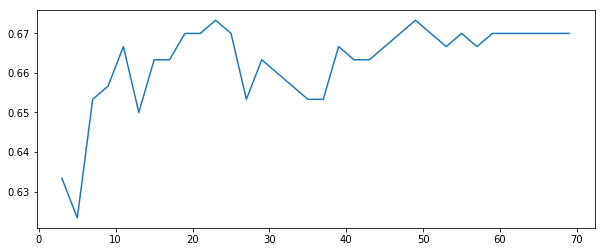

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(range(3,70,2), acc_score)
plt.show()

In [22]:
#so we'll select k = 23 when I am optimizing on accuracy. 
#I can optimize on the performance metric of my choice: precision recall f1 score accuracy

In [23]:
mod = KNeighborsClassifier(n_jobs=-1, n_neighbors=15,weights="distance")
#weights can take "uniform" (default) or distance. Distance means higher weightage is given to the 
#closest neighbours and lowere weightage is given to distant neighbours.
#n_jobs = -1 - the number of parallel jobs to run for neigbours search
#you can set n_jobs to 3 / 4. If n_jobs = -1, then the number of jobs is set to the cpu cores.

In [24]:
mod.fit(X_train, y_train)
ypred = mod.predict(X_test)

In [25]:
accuracy_score(y_test, ypred)

0.68

In [53]:
from sklearn.model_selection import GridSearchCV
mod.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'distance'}

In [54]:
params = {'p': [1,2,3],
         "n_neighbors": range(1, 30, 2)}

In [55]:
grid = GridSearchCV(estimator=mod, param_grid=params, n_jobs=-1, cv = 5, scoring = "accuracy")

In [56]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'p': [1, 2, 3], 'n_neighbors': range(1, 30, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
grid.best_params_ #this is according to gridsearchcv results

{'n_neighbors': 25, 'p': 2}

In [58]:
grid.best_score_

0.7214285714285714

In [59]:
accuracy_score(y_test, grid.predict(X_test))

0.67

In [60]:
recall_score(y_test, grid.predict(X_test))

0.09090909090909091

#### Creating The Decision Boundary 

In [34]:
a = np.arange(1,3,1)
a

array([1, 2])

In [35]:
b = np.arange(10,15,1)
b

array([10, 11, 12, 13, 14])

In [36]:
xx,yy = np.meshgrid(a,b)
print(xx)
print()
print(yy)

[[1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]]

[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]]


In [37]:
np.c_[xx.ravel(),yy.ravel()] #we get all possible combinations

array([[ 1, 10],
       [ 2, 10],
       [ 1, 11],
       [ 2, 11],
       [ 1, 12],
       [ 2, 12],
       [ 1, 13],
       [ 2, 13],
       [ 1, 14],
       [ 2, 14]])

In [38]:
#same thing we'll do with our data

In [39]:
X_train.head(1)

,duration,amount,installment,residence,age,cards
0,-0.70643,-0.931384,0.91951,1.032437,1.788554,-0.703434


In [40]:
Xtr = X_train.iloc[:,[0,1]]
Xtr.head()

,duration,amount
0,-0.706430,-0.931384
1,-1.214305,-0.594079
2,-0.706430,-0.901117
3,0.309320,-0.282666
4,-0.875721,1.508146


In [41]:
x1min, x1max = Xtr.iloc[:,0].min()-.5, Xtr.iloc[:,0].max()+.5
x1min, x1max

(-1.8835961263390686, 3.8565688931060884)

In [42]:
x2min, x2max = Xtr.iloc[:,1].min()-.5, Xtr.iloc[:,1].max()+.5
x2min, x2max

(-1.5655758763724794, 6.06163038280512)

In [43]:
xx,yy = np.meshgrid(np.arange(x1min,x1max,.05), np.arange(x2min, x2max, .05))

In [44]:
arr = np.c_[xx.ravel(),yy.ravel()]

In [45]:
grid.best_params_

{'n_neighbors': 25, 'p': 2}

In [46]:
knn = KNeighborsClassifier(25, p = 2)
knn.fit(Xtr,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [47]:
Z = knn.predict(arr)
Z

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
Z = Z.reshape(xx.shape)

In [49]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

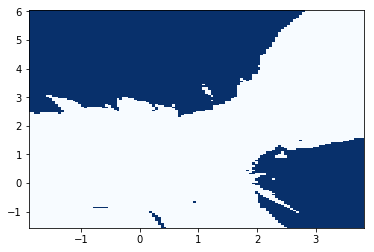

In [50]:
plt.pcolormesh(xx,yy,Z, cmap = "Blues")

In [51]:
import seaborn as sns

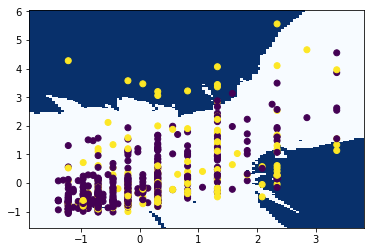

In [52]:
plt.pcolormesh(xx,yy,Z, cmap = "Blues")
plt.scatter(Xtr.iloc[:,0], Xtr.iloc[:,1], c = y_train)